**<center><font size=10>NETFLIX DATA ANALYSIS</font></center>**



<img src="Netflix_logo.png" alt="Image Alt Text" width="1100" height="900">

<font size="5">For our project there are some imports and libraries to be used for the data analysis. So we will make input of all required imports.</font>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gd
from shapely.geometry import Point
from warnings import filterwarnings
filterwarnings("ignore")

<font size="5">Importing the Data </font>

In [2]:
df = pd.read_csv('netflix1.csv')

<font size="5">All Basic and Statistics Information</font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [16]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [5]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.shape

(8790, 10)

In [8]:
print("Number of Rows ", df.shape[0])
print("Number of Columns ", df.shape[1])

Number of Rows  8790
Number of Columns  10


In [10]:
df.index

RangeIndex(start=0, stop=8790, step=1)

<font size="5">Null Values</font>

In [32]:
missing = df.isnull().sum()

print(missing)

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


<img src="image4.jpeg" alt="Image Alt Text" width="1000" height="300">

<font size="5">Now We will start the analysis based upon our data set</font>

<font size="4">1. Distrubution of Types of users</font>

In [50]:
unique_values_type = df['type'].unique()

print(unique_values_type)

['Movie' 'TV Show']


In [51]:
total_unique_value_counts = df['type'].value_counts()

print(total_unique_value_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


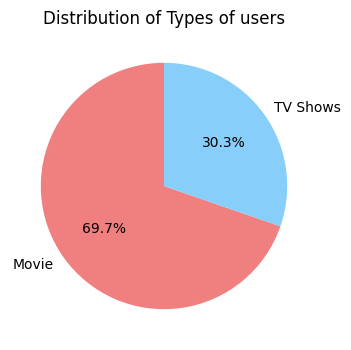

In [52]:
plt.figure(figsize=(4,4))
plt.pie(total_unique_value_counts, labels=['Movie', 'TV Shows'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Types of users')

plt.show()

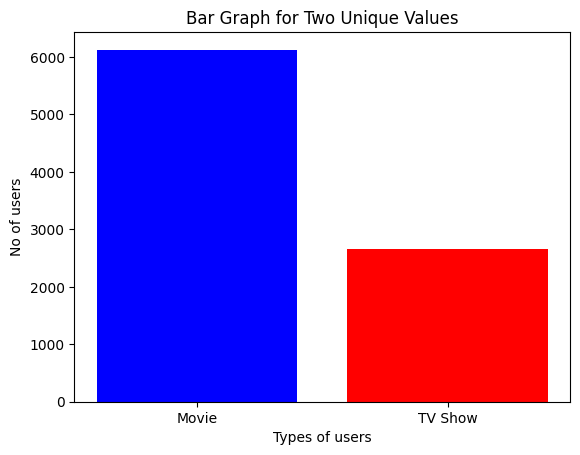

In [54]:
plt.bar(total_unique_value_counts.index, total_unique_value_counts.values, color=['blue', 'red'])

plt.xlabel('Types of users')
plt.ylabel('No of users')
plt.title('Bar Graph for Two Unique Values')

plt.show()

<font size="5">Analysis of the Types of user based on top 10 Countries</font>

<font size="4"> As of now we are analysing on the basis or using country then we need to check the data of the country column</font>

In [59]:
column_to_clean = 'country'
values_to_remove = ['Not Given']

df_cleaned = df[~df[column_to_clean].isin(values_to_remove)]

df_cleaned.to_csv('country_cleaned_data.csv', index=True)

df1 = pd.read_csv('country_cleaned_data.csv')

In [60]:
top_country_value_count = df1['country']

print(top_country_value_count.head(50))

0      United States
1             France
2      United States
3             Brazil
4      United States
5     United Kingdom
6      United States
7              India
8            Germany
9              India
10             India
11             India
12          Pakistan
13     United States
14     United States
15     United States
16     United States
17          Pakistan
18          Pakistan
19     United States
20     United States
21     United States
22     United States
23     United States
24     United States
25             India
26     United States
27     United States
28     United States
29          Pakistan
30          Pakistan
31          Pakistan
32          Pakistan
33          Pakistan
34          Pakistan
35          Pakistan
36          Pakistan
37          Pakistan
38          Pakistan
39          Pakistan
40          Pakistan
41          Pakistan
42          Pakistan
43          Pakistan
44          Pakistan
45          Pakistan
46          Pakistan
47           

<font size="4">Dataset has been changed and saved into another file</font>

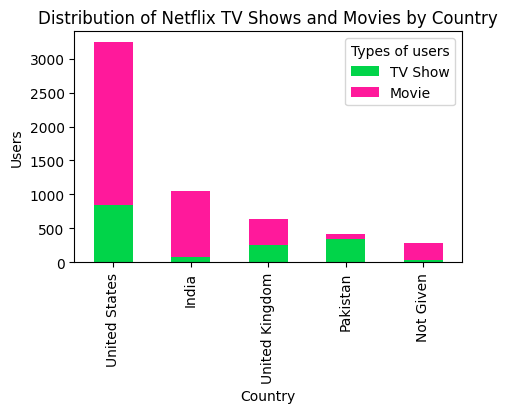

In [61]:
df_counts = df.groupby(['country', 'type']).size().unstack()

top_countries = df_counts.sum(axis=1).nlargest(5).index
df_top_countries = df_counts.loc[top_countries]

df_top_countries[['TV Show', 'Movie']].plot(kind='bar', stacked=True, figsize=(5, 3),color=['#01d449','#ff199b'])
plt.title('Distribution of Netflix TV Shows and Movies by Country')
plt.xlabel('Country')
plt.ylabel('Users')
plt.legend(title='Types of users')
    
plt.show()


<font size="5">Analysis of Releases of TV Shows and Movies according to year</font>

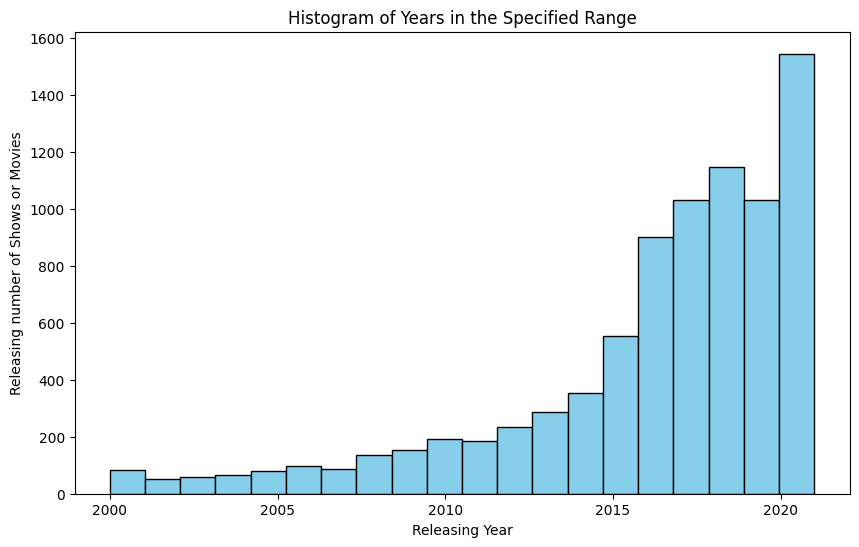

In [62]:
year_column = 'release_year'

start_year = 2000
end_year = 2024

year_range = (start_year, end_year)

filtered_data = df[(df[year_column] >= start_year) & (df[year_column] <= end_year)]

plt.figure(figsize=(10, 6))
plt.hist(filtered_data[year_column], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Releasing Year')
plt.ylabel('Releasing number of Shows or Movies')
plt.title('Histogram of Years in the Specified Range')

plt.show()


<font size="5.5">Number of releases of TV Shows or Movies according to year</font>

In [63]:
release_counts = df.groupby('release_year').size().reset_index(name='Total Releases')

print(release_counts)

    release_year  Total Releases
0           1925               1
1           1942               2
2           1943               3
3           1944               3
4           1945               4
..           ...             ...
69          2017            1030
70          2018            1146
71          2019            1030
72          2020             953
73          2021             592

[74 rows x 2 columns]


<img src="image2.jpeg" alt="Image Alt Text" width="1000" height="100" align="center">


In [65]:
release_counts = df.groupby('release_year').size().reset_index(name='Total Releases')
print(release_counts)

    release_year  Total Releases
0           1925               1
1           1942               2
2           1943               3
3           1944               3
4           1945               4
..           ...             ...
69          2017            1030
70          2018            1146
71          2019            1030
72          2020             953
73          2021             592

[74 rows x 2 columns]


In [66]:
print("Releases of TV Shows or Movies of first 30 years data")
print()
print()
release_counts.head(30)

Releases of TV Shows or Movies of first 30 years data




,release_year,Total Releases
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
5,1946,2
6,1947,1
7,1954,2
8,1955,3
9,1956,2


In [67]:
print("Releases of TV Shows or Movies of lastest 30 years data")
print()
print()
release_counts.tail(30)

Releases of TV Shows or Movies of lastest 30 years data




,release_year,Total Releases
44,1992,23
45,1993,28
46,1994,22
47,1995,25
48,1996,24
49,1997,38
50,1998,36
51,1999,39
52,2000,37
53,2001,45


<img src="image5.jpg" alt="Image Alt Text" width="1000" height="600" align="center">

In [4]:
total_unique_value_counts = df['release_year'].value_counts()
print(total_unique_value_counts)

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: count, Length: 74, dtype: int64


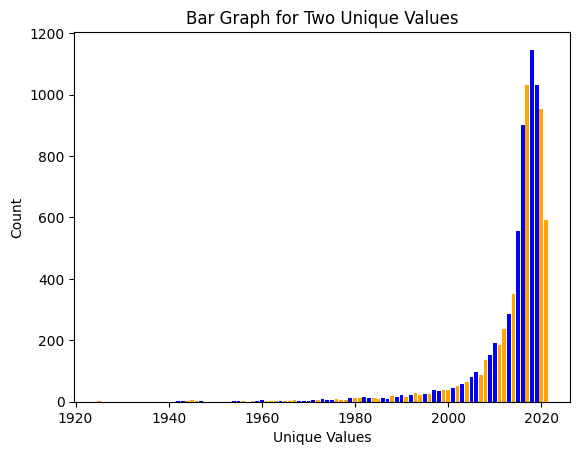

In [5]:
plt.bar(total_unique_value_counts.index, total_unique_value_counts.values, color=['blue', 'orange'])

plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Bar Graph for Two Unique Values')

plt.show()

<font size="5">Analysis on Directors of TV Shows and Movies</font>

In [68]:
column_to_clean3 = 'director'
values_to_remove3 = ['Not Given']

df_cleaned3 = df[~df[column_to_clean3].isin(values_to_remove3)]

df_cleaned3.to_csv('director_cleaned_data.csv', index=True)

df2 = pd.read_csv('director_cleaned_data.csv')

In [69]:
unique_values_type2 = df2['director']

print(unique_values_type2)

0                    Kirsten Johnson
1                    Julien Leclercq
2                      Mike Flanagan
3                      Bruno Garotti
4                       Haile Gerima
                    ...             
6197    Mark Thornton, Todd Kauffman
6198    Mark Thornton, Todd Kauffman
6199    Mark Thornton, Todd Kauffman
6200                Walter C. Miller
6201                     Stan Lathan
Name: director, Length: 6202, dtype: object


In [71]:
df2['director'].value_counts

<bound method IndexOpsMixin.value_counts of 0                    Kirsten Johnson
1                    Julien Leclercq
2                      Mike Flanagan
3                      Bruno Garotti
4                       Haile Gerima
                    ...             
6197    Mark Thornton, Todd Kauffman
6198    Mark Thornton, Todd Kauffman
6199    Mark Thornton, Todd Kauffman
6200                Walter C. Miller
6201                     Stan Lathan
Name: director, Length: 6202, dtype: object>

<img src="image3.jpg" alt="Image Alt Text" width="1000" height="300">

<font size="5">Top 10 most recurring directors on Netflix </font>

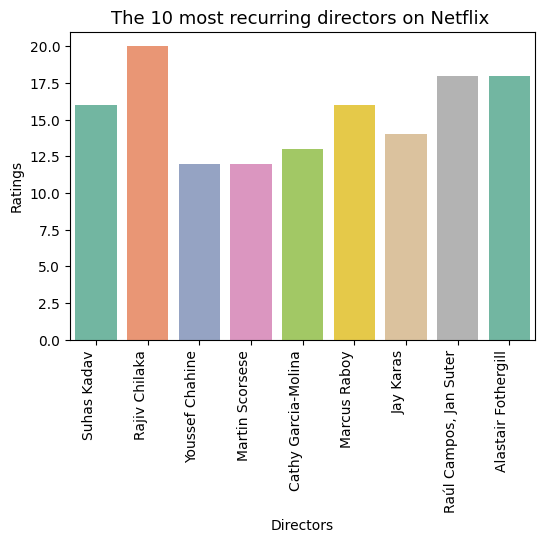

In [5]:
category_counts = df["director"].value_counts()[1:10]

top_categories = category_counts.head(10)

plt.figure(figsize=(6, 4))
palette = sns.color_palette("Set2")
sns.countplot(x=df[df["director"].isin(top_categories.index)]["director"], palette=palette)
plt.xticks(rotation=90, ha="right")
plt.xlabel('Directors')
plt.ylabel('Ratings')
plt.title("The 10 most recurring directors on Netflix ",fontsize=13)

plt.show()

<font size="5">Product Analysis</font>

In [6]:
df['title']

0                   Dick Johnson Is Dead
1                              Ganglands
2                          Midnight Mass
3       Confessions of an Invisible Girl
4                                Sankofa
                      ...               
8785                          Yunus Emre
8786                           Zak Storm
8787                  Zindagi Gulzar Hai
8788                                Yoko
8789                                 YOM
Name: title, Length: 8790, dtype: object

In [7]:
df['title'].value_counts()

title
9-Feb                   2
15-Aug                  2
22-Jul                  2
Dick Johnson Is Dead    1
SGT. Will Gardner       1
                       ..
Mercy Black             1
The Trap                1
Pinky Memsaab           1
Love O2O                1
YOM                     1
Name: count, Length: 8787, dtype: int64

In [8]:
df['title'].unique

<bound method Series.unique of 0                   Dick Johnson Is Dead
1                              Ganglands
2                          Midnight Mass
3       Confessions of an Invisible Girl
4                                Sankofa
                      ...               
8785                          Yunus Emre
8786                           Zak Storm
8787                  Zindagi Gulzar Hai
8788                                Yoko
8789                                 YOM
Name: title, Length: 8790, dtype: object>

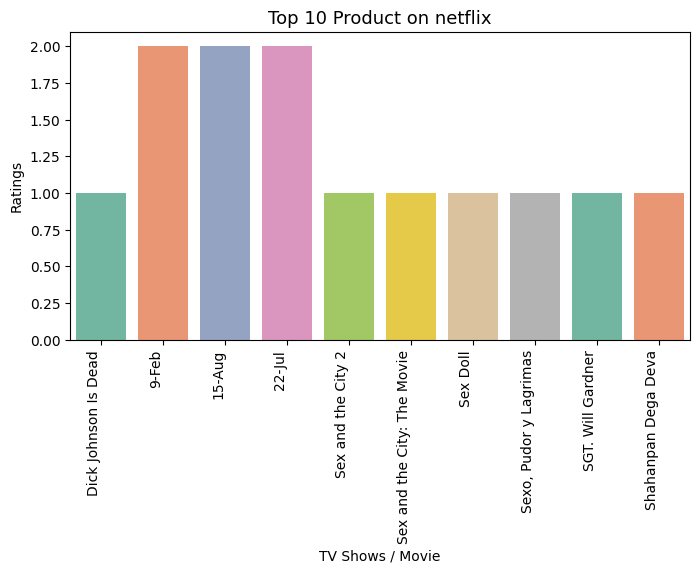

In [4]:
category_counts = df["title"].value_counts()

top_categories = category_counts.head(10)

plt.figure(figsize=(8, 4))
palette = sns.color_palette("Set2")
sns.countplot(x=df[df["title"].isin(top_categories.index)]["title"], palette=palette)
plt.xticks(rotation=90, ha="right")
plt.xlabel('TV Shows / Movie')
plt.ylabel('Ratings')
plt.title("Top 10 Product on netflix",fontsize=13)

plt.show()

In [14]:
category_counts = df["title"].value_counts()
top_categories = category_counts.head(10)
print(top_categories)

title
9-Feb                          2
15-Aug                         2
22-Jul                         2
Dick Johnson Is Dead           1
SGT. Will Gardner              1
Sex and the City 2             1
Sex and the City: The Movie    1
Sex Doll                       1
Sexo, Pudor y Lagrimas         1
Shahanpan Dega Deva            1
Name: count, dtype: int64


In [16]:
df["country"].value_counts()[0:19]

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Egypt              123
Australia          114
Turkey             112
Nigeria            105
Germany            104
China              100
Brazil              88
Taiwan              86
Name: count, dtype: int64

<font size="5">Number of the viewing activities or distribution of viewing activities on the basis top n countries </font>

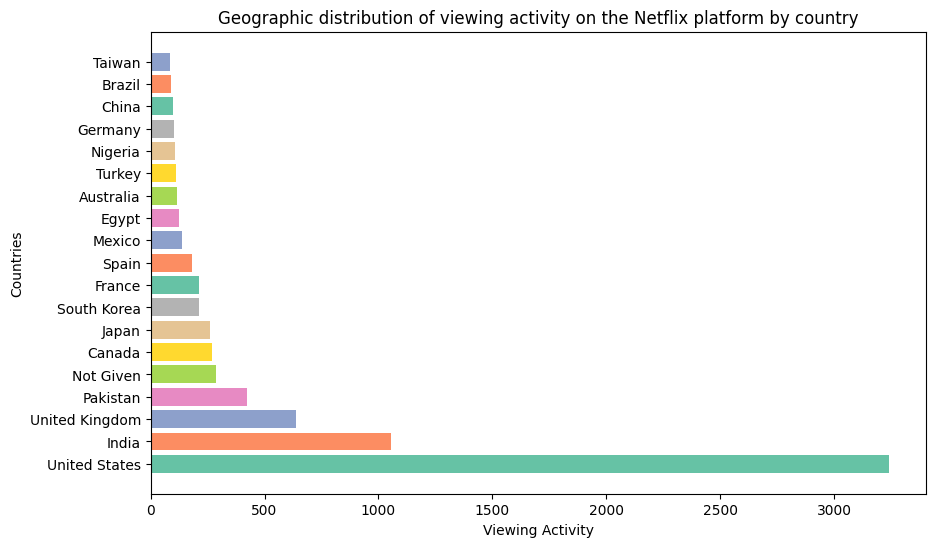

In [20]:
countries =  ['United States', 'India', 'United Kingdom', 'Pakistan', 'Not Given', 'Canada', 'Japan', 'South Korea', 'France',
                    'Spain', 'Mexico', 'Egypt', 'Australia', 'Turkey', 'Nigeria', 'Germany', 'China', 'Brazil', 'Taiwan']

viewing_activity= [3240, 1057, 638, 421, 287, 271, 259, 214, 213, 182, 138, 123, 114, 112, 105, 104, 100, 88, 86]

plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set2")
plt.barh(countries, viewing_activity, color=palette)
plt.xlabel('Viewing Activity')
plt.ylabel('Countries')
plt.title('Geographic distribution of viewing activity on the Netflix platform by country')

plt.show()

<font size="5">Rating Analysis</font>

In [22]:
df["rating"].unique

<bound method Series.unique of 0       PG-13
1       TV-MA
2       TV-MA
3       TV-PG
4       TV-MA
        ...  
8785    TV-PG
8786    TV-Y7
8787    TV-PG
8788     TV-Y
8789    TV-Y7
Name: rating, Length: 8790, dtype: object>

In [23]:
df["rating"].value_counts()[0:14]

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

<font size="5">Pie Chart for Top 8 Ratings of TV Shows and Movies </font>

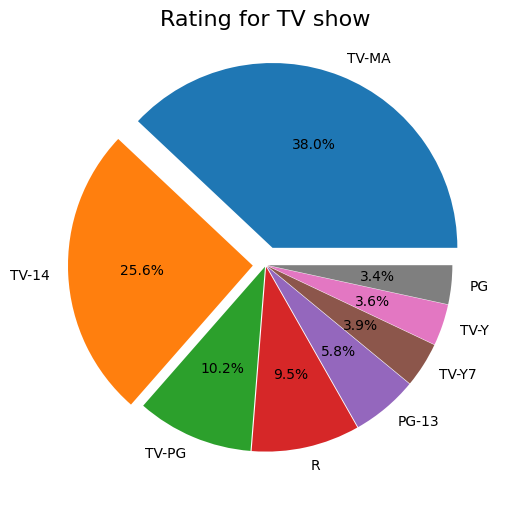

In [26]:
df["rating"].value_counts()[0:8].plot.pie(figsize=(6,6),explode=(0.1,0.07,0.01,0.01,0.01,0.01,0.01,0.01),autopct="%1.1f%%")
plt.title("Rating for TV show",fontsize=16)
plt.ylabel('')
plt.show()

<font size="5">Contents Analysis Yearly</font>

In [28]:
df["release_year"].unique

<bound method Series.unique of 0       2020
1       2021
2       2021
3       2021
4       1993
        ... 
8785    2016
8786    2016
8787    2012
8788    2016
8789    2016
Name: release_year, Length: 8790, dtype: int64>

In [29]:
df["release_year"].value_counts()[0:14]

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
2010     192
2011     185
2009     152
2008     135
Name: count, dtype: int64

<font size="5">Line Chart to Analys the number of contents added yearly</font>

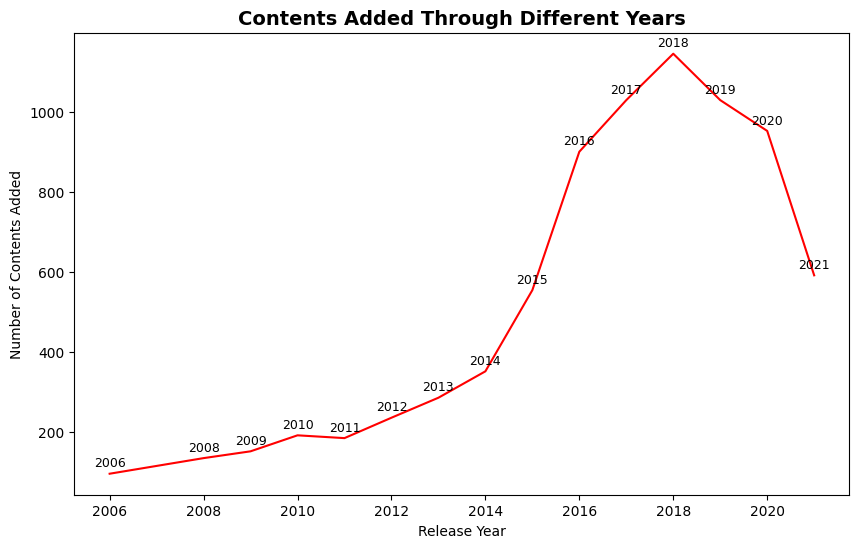

In [31]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=df['release_year'].value_counts().head(15).index,
             y=df['release_year'].value_counts().head(15).values,
             alpha=1, color="r")

for i, txt in enumerate(df['release_year'].value_counts().head(15).index):
    plt.annotate(txt, (df['release_year'].value_counts().head(15).index[i],
                       df['release_year'].value_counts().head(15).values[i]),
                 textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)

plt.xlabel('Release Year')
plt.ylabel('Number of Contents Added')
plt.title('Contents Added Through Different Years', fontsize=14, fontweight='heavy')

plt.show()

<img src="image1.png" alt="Image Alt Text" width="1000" height="400">

<font size="5"> Data analysis on Netflix data involves examining the streaming platform's dataset to derive meaningful insights into user behavior, content trends, and overall platform performance.

Key Components:

Content Distribution

Analyzing the distribution of content types (movies vs. TV shows) to understand the platform's content portfol
io.
Global Rech:

Examining regional preferences and content availability to understand Netflix's global aud
ience.
Original Produtions:

Assessing the success and impact of original productions, highlighting the role of exclusive
 content.
Populr Genres:

Identifying popular content genres to guide future content acquisition and creation
 strategies.
Reease Trends:

Analyzing release patterns over time to uncover strategic decisions and content 
library growth.
Directo Contributions:

Recognizing directors with significant contributions to Netflix content, showcasing key figures in the p
latform's success
User Engagement:

Evaluating user engagement metrics, such as ratings and viewing patterns, to understand

Visualizations:
Data analysis often involves creating visualizations, such as bar charts, graphs, and plots, to effectively communicate findings and make insights accessible to stakeholders

Summary:
In summary, data analysis on Netflix data is a vital process for extracting actionable insights that drive informed decisions, shape content strategies, and contribute to the platform's sustained success in the ever-changing entertainment landscape. </font>. audience preferences.